In [ ]:
#Prerrequisitos para usar FastAI
#!pip install -Uqq fastbook
!pip install nbdev
#import fastbook
#fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *
import torch.nn.functional as F
import numpy



import torchvision
from torchvision import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00
fastcore version 1.5.29 installed
fastai version 2.7.14 installed


In [ ]:
# Función para printar las gráficas de entrenamiento
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [ ]:
LeNet5_3c = nn.Sequential(
    nn.Conv2d(3,6,kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2),
    nn.Conv2d(6,16,kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2),
    nn.Linear(5,120),
    nn.Tanh(),
    nn.Linear(120,84),
    nn.Tanh()
)

LeNet5 = nn.Sequential(
    nn.Conv2d(1,6,kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2),
    nn.Conv2d(6,16,kernel_size=5),
    nn.Tanh(),
    nn.AvgPool2d(2),
    nn.Linear(5,120),
    nn.Tanh(),
    nn.Linear(120,84),
    nn.Tanh()
)

In [ ]:
def AlexNet():
    return nn.Sequential(
    nn.Conv2d(3,96,kernel_size=11, stride=4, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96,256,kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(),

    nn.Flatten(),
    nn.Linear(9216,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,10)
)

In [ ]:
print(path.ls())

[Path('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'), Path('/root/.fastai/data/imagenette2-160/train'), Path('/root/.fastai/data/imagenette2-160/.DS_Store'), Path('/root/.fastai/data/imagenette2-160/val')]


In [ ]:
path = untar_data(URLs.IMAGENETTE_160)

In [ ]:
########### SGD Mini-batch
train= DataBlock(
        blocks=(ImageBlock(),CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter(train_name='train', valid_name='val'),
        get_y=parent_label,
        batch_tfms=[ Normalize.from_stats(*imagenet_stats)],
        item_tfms=[Resize(128)]
    ).dataloaders(path, bs=32)


model=AlexNet()
learn=Learner(train,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)
#lr_max=learn.lr_find()
#learn.fit_one_cycle(30, lr_max=lr_max, cbs=[EarlyStoppingCallback(min_delta=0.01,patience=4), SaveModelCallback()])


In [ ]:
train= DataBlock(
        blocks=(ImageBlock(),CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter(train_name='train', valid_name='val'),
        get_y=parent_label,
        batch_tfms=[ Normalize.from_stats(*imagenet_stats)],
        item_tfms=[Resize(128)]
    ).dataloaders(path, bs=32)
##Tarda más en ejecutar que Mini-Batch. Razon?= la derivada de los ReLU es muy simple por lo que no ocupa mucho tiempo, sin embargo al tener tantos parámetros que actualizar, y estar actualizando en
##cada elemento, tarda mucho más. 32x0,35=19,73 min

model=AlexNet()
learn=Learner(train,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)
lr_max=learn.lr_find()
learn.fit_one_cycle(30, lr_max=lr_max, cbs=[EarlyStoppingCallback(min_delta=0.01,patience=4), SaveModelCallback()])


KeyboardInterrupt: 

In [ ]:
train= DataBlock(
        blocks=(ImageBlock(),CategoryBlock),
        get_items=get_image_files,
        splitter=GrandparentSplitter(train_name='train', valid_name='val'),
        get_y=parent_label,
        batch_tfms=[ Normalize.from_stats(*imagenet_stats)],
        item_tfms=[Resize(128)]
    ).dataloaders(path, bs=9469)
##Tarda más en ejecutar que Mini-Batch. Razon?= la derivada de los ReLU es muy simple por lo que no ocupa mucho tiempo, sin embargo al tener tantos parámetros que actualizar, y estar actualizando en
##cada elemento, tarda mucho más. 32x0,35=19,73 min

model=AlexNet()
learn=Learner(train,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)
lr_max=learn.lr_find()
learn.fit_one_cycle(30, lr_max=lr_max, cbs=[EarlyStoppingCallback(min_delta=0.01,patience=4), SaveModelCallback()])

epoch,train_loss,valid_loss,accuracy,time
0,2.294251,2.288944,0.103694,00:37
1,2.269953,2.270154,0.111592,00:35
2,2.247643,2.239829,0.177580,00:35
3,2.101175,2.086470,0.219363,00:35
4,2.037973,2.010421,0.264204,00:35
5,1.942370,1.908103,0.325860,00:35
6,1.826809,1.815388,0.366369,00:35
7,1.765478,1.727392,0.392866,00:37
8,1.654316,1.655956,0.418089,00:36
9,1.606447,1.597077,0.439745,00:36


Better model found at epoch 0 with valid_loss value: 2.2889442443847656.
Better model found at epoch 1 with valid_loss value: 2.2701539993286133.
Better model found at epoch 2 with valid_loss value: 2.2398293018341064.
Better model found at epoch 3 with valid_loss value: 2.086470365524292.
Better model found at epoch 4 with valid_loss value: 2.010420560836792.
Better model found at epoch 5 with valid_loss value: 1.9081025123596191.
Better model found at epoch 6 with valid_loss value: 1.8153882026672363.
Better model found at epoch 7 with valid_loss value: 1.7273920774459839.
Better model found at epoch 8 with valid_loss value: 1.6559560298919678.
Better model found at epoch 9 with valid_loss value: 1.597077488899231.


epoch,train_loss,valid_loss,accuracy,time
0,2.294251,2.288944,0.103694,00:37
1,2.269953,2.270154,0.111592,00:35
2,2.247643,2.239829,0.177580,00:35
3,2.101175,2.086470,0.219363,00:35
4,2.037973,2.010421,0.264204,00:35
5,1.942370,1.908103,0.325860,00:35
6,1.826809,1.815388,0.366369,00:35
7,1.765478,1.727392,0.392866,00:37
8,1.654316,1.655956,0.418089,00:36
9,1.606447,1.597077,0.439745,00:36


Better model found at epoch 10 with valid_loss value: 1.567872405052185.
Better model found at epoch 11 with valid_loss value: 1.5058315992355347.
Better model found at epoch 12 with valid_loss value: 1.4718410968780518.
Better model found at epoch 14 with valid_loss value: 1.4592994451522827.
Better model found at epoch 15 with valid_loss value: 1.407860517501831.
Better model found at epoch 16 with valid_loss value: 1.392593502998352.
Better model found at epoch 17 with valid_loss value: 1.380354404449463.
Better model found at epoch 18 with valid_loss value: 1.3623288869857788.
Better model found at epoch 20 with valid_loss value: 1.3390439748764038.
Better model found at epoch 21 with valid_loss value: 1.3054579496383667.
Better model found at epoch 22 with valid_loss value: 1.3027492761611938.
Better model found at epoch 23 with valid_loss value: 1.2909870147705078.
Better model found at epoch 25 with valid_loss value: 1.2857004404067993.
Better model found at epoch 27 with valid_

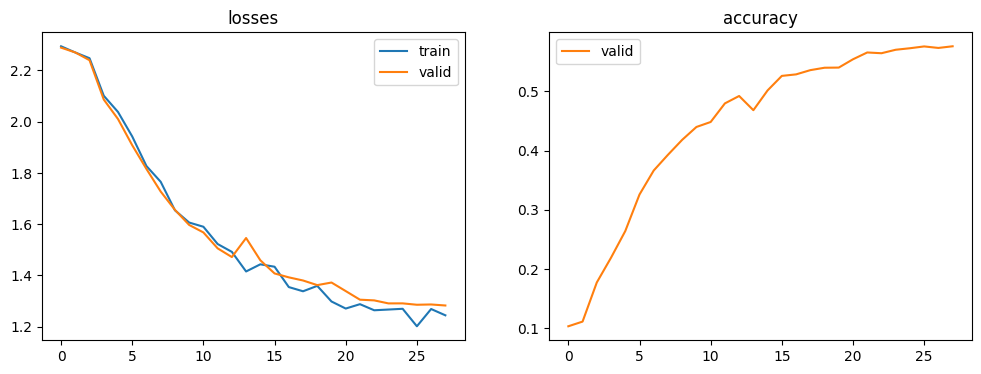

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
batches=[1,2,4,8,16,32,64,128,256,512,len(files_train)]

batches=[32]
train=[]
for bs in batches:
  train.append(
        DataBlock(
        blocks=(ImageBlock(),CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.1),
        get_y=parent_label,
        batch_tfms=[ Normalize.from_stats(*cifar_stats)]
        #item_tfms=[]
    ).dataloaders(path/'train', bs=bs)
  )

model=alexnet()
learn=[]
for tr in train:
  learn.append(Learner(tr,model,metrics=accuracy, loss_func=CrossEntropyLossFlat))


In [ ]:
train[0].show_batch()

In [ ]:
lr=[]
for l in learn:
  lr.append(l.lr_find())

cbs=[SaveModelCallback(), EarlyStoppingCallback(min_delta=0.01, patience=4) ]

for l,lr in zip(learn,lr):
    l.fit_one_cycle(epochs=200,lr=lr[0], cbs=cbs)
#lr fin
#callbacks
#entrenamiento

In [ ]:
#GenAlg
from numpy import random

model=AlexNet()
learn=Learner(train,model,loss_func=CrossEntropyLossFlat(),metrics=accuracy)

num_cros=5
num_elim=2
num_nuevos=2
modelos=[]
for i in range(num_cros):
  modelos.append(Learner(train, AlexNet(), loss_func=CrossEntropyLossFlat(),metrics=accuracy))

fitness=[]
for j in range(5):
  print("EPOC NUMERO {}".format(j+1))
  for i in range(num_cros):
    print("Entrenando al hijo {}".format(i+1))
    modelos[i].fit(1)
    #fitness.append(float(1/modelos[1].recorder.final_record[0]))

  #for i in range(num_cros):

  indices = np.argsort([model.recorder.final_record[0] for model in modelos])
  print("Orden de mejores hijos: {}".format(indices))

  modelos_ord = np.array(modelos)[indices.astype(int)]
  #Elimino los 2 últimos
  modelos_ord = modelos_ord[0:num_cros-num_elim]
  print("tamaño incial del vector: {}".format(len(modelos)))
  print("tamaño del vector despúes de eliminar 2: {}".format(len(modelos_ord)))

  #Cogiendo los dos mejores, tengo que seleccionar los pesos de los dos, coger la mitad de uno y la mitad de otro, y hacer algunos ceros
  # y pegarlos en otro modelos rollo máscara

  a=modelos_ord[0].model.state_dict()
  b=modelos_ord[1].model.state_dict()
  dic=[]
  for k in range(num_nuevos):
    dictn=OrderedDict()
    for clave1,valor1 in b.items():
      dictn.update({clave1:valor1 * (k+1)/(num_nuevos+1)})
    for clave1,valor1 in a.items():
      dictn.update({clave1:dictn[clave1] + valor1 * (num_nuevos-k/(num_nuevos+1))})

    learn=Learner(train, AlexNet(), loss_func=CrossEntropyLossFlat(),metrics=accuracy)
    learn.model.load_state_dict(dictn)
    modelos_ord = np.append(modelos_ord, learn)


  modelos= modelos_ord






EPOC NUMERO 1
Entrenando al hijo 1


OutOfMemoryError: Exception occured in `TrainEvalCallback` when calling event `before_fit`:
	CUDA out of memory. Tried to allocate 144.00 MiB. GPU 0 has a total capacty of 14.75 GiB of which 21.06 MiB is free. Process 2093 has 14.72 GiB memory in use. Of the allocated memory 14.49 GiB is allocated by PyTorch, and 81.60 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
model_weights = modelos[0].model.state_dict()
#weights_list = [param.data for param in model_weights]
weights_tensor = torch.cat([param.data.flatten() for param in model_weights])
print(len(weights_tensor))
learner= Learner(train, AlexNet(), loss_func=CrossEntropyLossFlat(),metrics=accuracy)
learner.model.load_state_dict({'model': weights_tensor.reshape(learn.model.parameters().__next__().shape)})
learner.model.load_state_dict(weights_tensor.reshape(model_weights.__next__().shape))

In [ ]:
a=modelos[0].model.state_dict()
b=modelos[1].model.state_dict()
dictn=OrderedDict()
for clave1,valor1 in b.items():
  dictn.update({clave1:valor1/4})

for clave1,valor1 in a.items():
  dictn.update({clave1:dictn[clave1] + valor1 * (3/4)})

learner.model.load_state_dict(dictn)

<All keys matched successfully>

In [ ]:
torch.cuda.empty_cache()

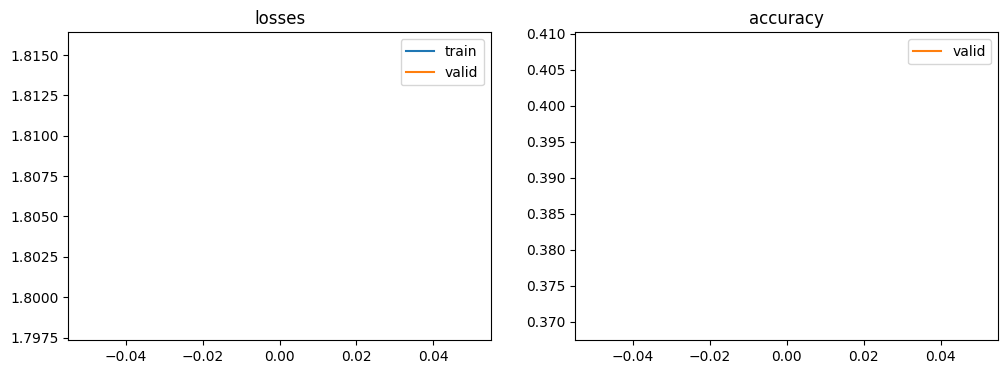

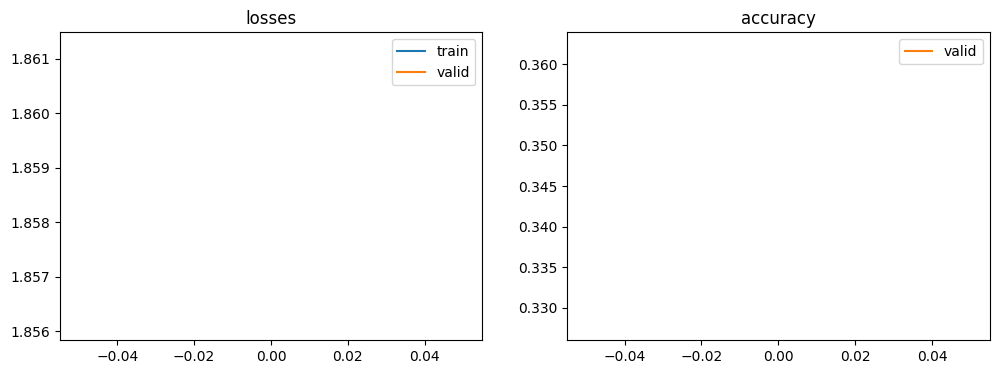

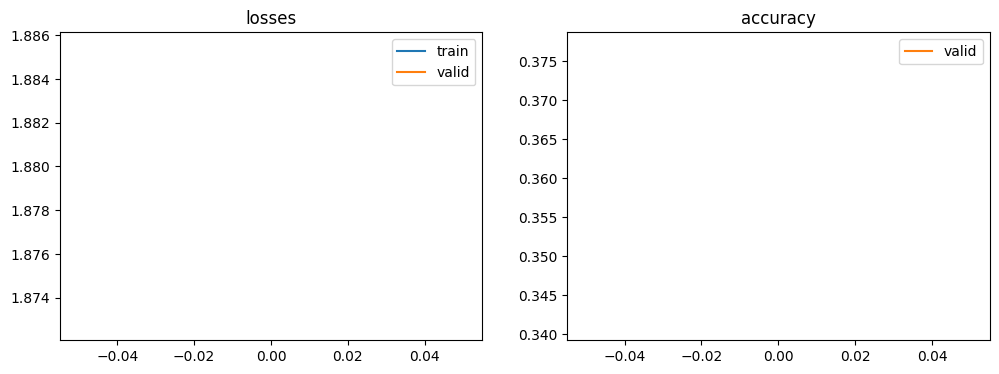

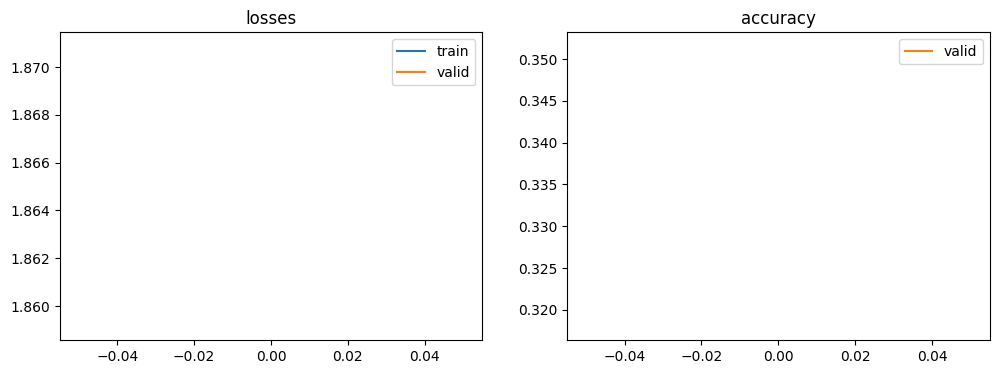

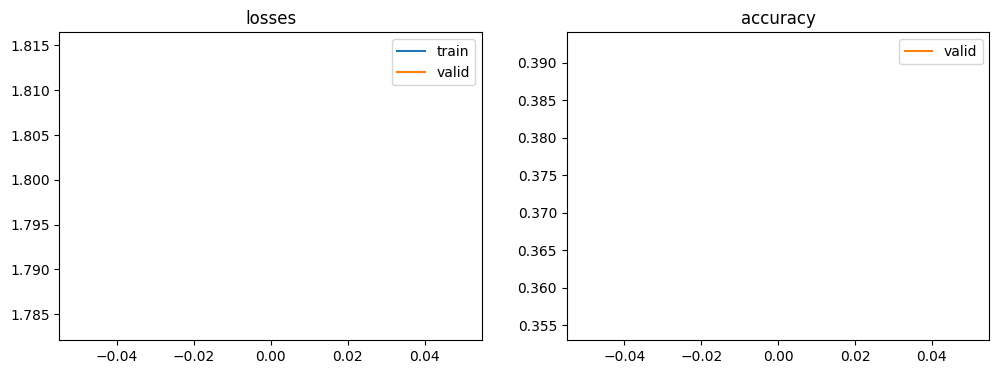

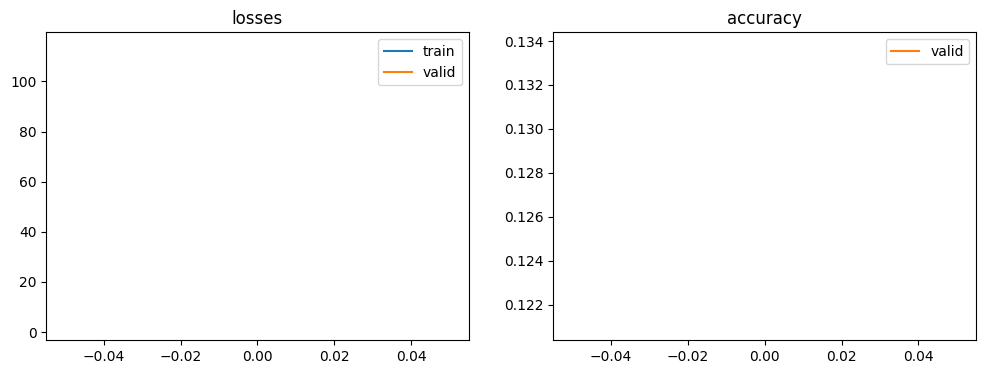

ValueError: need at least one array to stack

In [ ]:
for model in modelos_ord:
  model.recorder.plot_metrics()